# Imports

### Libraries

In [1]:
import os
import time

# Importing processing libraries
import numpy as np
import pandas as pd

# Importing Visualisation libraries
import seaborn as sns
import palettable.scientific.sequential as palette
import matplotlib.pyplot as plt

### Data

In [2]:
df = pd.read_csv('./data.csv')

/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Cleaning and EDA

- Take a look at the data -- stats of variables
- categorical vs continuous features and their distributions
- Correlation Matrix
- NaN values? -- How to handle missing data?
- Outliers? Zscore vs IQR

### Taking a quick look at the variables and the data

In [3]:
print(df.shape)
display(df.head(5))

(37687, 23)


,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,1048,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,5,2015-01-26,2015-02-01,43.0,43.0,...,0.0,0.0,1,0.0,3.0,0.0,3,4,NaN,Sporadic
1,1059,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,16,2015-04-13,2015-04-19,22.0,22.0,...,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
2,1060,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,17,2015-04-20,2015-04-26,26.0,26.0,...,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
3,1061,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,18,2015-04-27,2015-05-03,17.0,17.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic
4,1062,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,19,2015-05-04,2015-05-10,23.0,23.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic


In [4]:
df.describe()

,REPORT_ID,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF
count,37687.000000,37687.000000,37687.000000,21941.000000,36342.000000,32178.000000,29096.000000,35675.000000,21607.000000,35881.000000,37687.000000,29822.000000,29803.000000,37518.000000,37687.000000,37687.000000
mean,114148.294823,2011.724786,25.676440,518.493870,411.836910,1.732053,34.550454,20.312684,0.008053,12.295198,59.109215,3.350211,3.455357,11.053947,16.387932,75.497148
std,61411.705594,3.671224,15.598346,2214.899923,1728.267011,18.273502,241.303055,147.154660,0.193694,114.484925,348.252654,50.367823,51.406832,69.450239,114.167861,408.013522
min,1048.000000,2004.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65333.500000,2009.000000,12.000000,18.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,116482.000000,2012.000000,25.000000,48.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,162612.500000,2014.000000,40.000000,126.000000,136.000000,0.000000,5.000000,4.000000,0.000000,1.000000,14.000000,0.000000,0.000000,3.000000,4.000000,21.000000
max,219405.000000,2020.000000,53.000000,42466.000000,42466.000000,840.000000,9735.000000,5498.000000,14.000000,7847.000000,13355.000000,2708.000000,2388.000000,1940.000000,4081.000000,13747.000000


### NaN Values

Amount of existing NaN values REPORT_ID                0
Country                  0
WHOREGION                0
FLUREGION                0
Year                     0
Week                     0
SDATE                    0
EDATE                    0
SPEC_RECEIVED_NB     15746
SPEC_PROCESSED_NB     1345
AH1                   5509
AH1N12009             8591
AH3                   2012
AH5                  16080
ANOTSUBTYPED          1806
INF_A                    0
BYAMAGATA             7865
BVICTORIA             7884
BNOTDETERMINED         169
INF_B                    0
ALL_INF                  0
ALL_INF2             29003
TITLE                    0
dtype: int64
---------


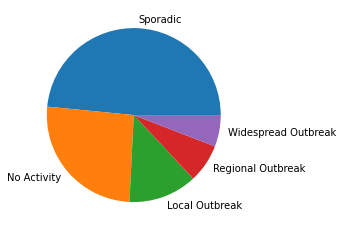

In [5]:
# Check na values
print('Amount of existing NaN values', df.isna().sum())
# df = df.fillna(0)
# df['column'] = df['column'].fillna(value)



print('---------')
# Target Class Distribution
target_dist = df['TITLE'].value_counts()
# print('Distribution of Target Class \n',target_dist)
names = [name for name in target_dist.index]
vals = [val for val in target_dist.values]

plt.pie(vals, labels=names)
plt.show()

## Outlier Detection and Removal

In [6]:
# fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15,4))

# sns.histplot(data['bmi'], bins=np.arange(data['bmi'].min(), data['bmi'].max()+1), ax = ax1)
# ax1.set(xlabel='BMI')
# sns.histplot( data['avg_glucose_level'], bins=np.arange(data['avg_glucose_level'].min(), data['avg_glucose_level'].max()+1), ax = ax2)
# ax2.set(xlabel='Avg Glucose Level')
# sns.histplot(data['age'], bins=np.arange(data['age'].min(), data['age'].max()+1), ax = ax3)
# ax3.set(xlabel='Age')
# plt.show()

In [7]:
# def outlier_detection(data, category):
#     mean = np.mean(data[category])
#     sd = np.std(data[category])
#     threshold = 2
#     outliers = []
#     for k, i in enumerate(data[category]): 
#         z = (i-mean)/sd 
#         if abs(z) > threshold: 
#             outliers.append(k) 
#     return data.drop(data.index[outliers])

# data = outlier_detection(data, 'bmi')
# data = outlier_detection(data, 'avg_glucose_level')

# print(data['stroke'].value_counts())
# print('--------------------------------')
# print(data.shape)

### Correlation Plot of all variables

<ipython-input-8-db916e907a98>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


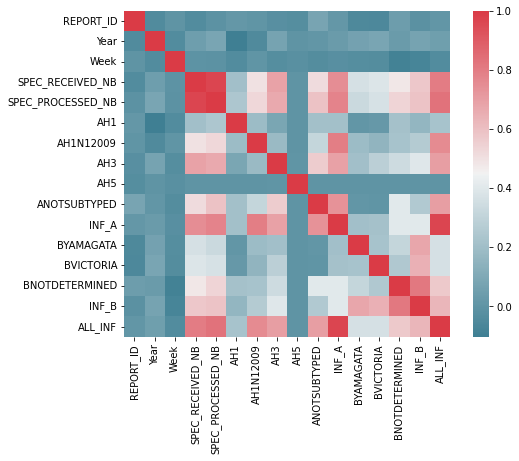

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [9]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-9-ce9744728a5b>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,REPORT_ID,Year,Week,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF
REPORT_ID,1.00,-0.05,-0.00,-0.04,-0.01,0.01,0.00,-0.02,-0.03,0.08,0.01,-0.05,-0.06,0.04,-0.02,0.01
Year,-0.05,1.00,-0.04,0.04,0.08,-0.10,-0.05,0.07,-0.00,0.00,0.03,0.06,0.08,0.03,0.07,0.05
Week,-0.00,-0.04,1.00,-0.01,-0.01,-0.04,0.00,-0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.09,-0.08,-0.04
SPEC_RECEIVED_NB,-0.04,0.04,-0.01,1.00,0.97,0.20,0.50,0.69,-0.00,0.51,0.75,0.36,0.38,0.48,0.58,0.80
SPEC_PROCESSED_NB,-0.01,0.08,-0.01,0.97,1.00,0.24,0.53,0.67,-0.00,0.59,0.78,0.33,0.37,0.54,0.59,0.83
AH1,0.01,-0.10,-0.04,0.20,0.24,1.00,0.19,0.09,-0.00,0.21,0.21,0.01,0.02,0.21,0.16,0.22
AH1N12009,0.00,-0.05,0.00,0.50,0.53,0.19,1.00,0.18,-0.00,0.31,0.79,0.19,0.15,0.22,0.26,0.75
AH3,-0.02,0.07,-0.03,0.69,0.67,0.09,0.18,1.00,-0.00,0.56,0.69,0.20,0.28,0.34,0.40,0.70
AH5,-0.03,-0.00,-0.02,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
ANOTSUBTYPED,0.08,0.00,-0.04,0.51,0.59,0.21,0.31,0.56,-0.00,1.00,0.73,0.01,-0.00,0.40,0.25,0.70


## Variables and Distributions

In [10]:
cat_variables = []

for column in df.columns:
    if len(df[column].unique()) < 200:
        cat_variables.append(column)
cont_variables = [x for x in list(df.columns) if x not in cat_variables]

print('Categorical Variables (', len(cat_variables), '): ', cat_variables)
print('Continuous Variables (', len(cont_variables), '): ', cont_variables)

Categorical Variables ( 8 ):  ['Country', 'WHOREGION', 'FLUREGION', 'Year', 'Week', 'AH1', 'AH5', 'TITLE']
Continuous Variables ( 15 ):  ['REPORT_ID', 'SDATE', 'EDATE', 'SPEC_RECEIVED_NB', 'SPEC_PROCESSED_NB', 'AH1N12009', 'AH3', 'ANOTSUBTYPED', 'INF_A', 'BYAMAGATA', 'BVICTORIA', 'BNOTDETERMINED', 'INF_B', 'ALL_INF', 'ALL_INF2']


In [11]:
df['SDATE'] = pd.to_datetime(df['SDATE'])
df['EDATE'] = pd.to_datetime(df['EDATE'])

/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/harshjhunjhunwala/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


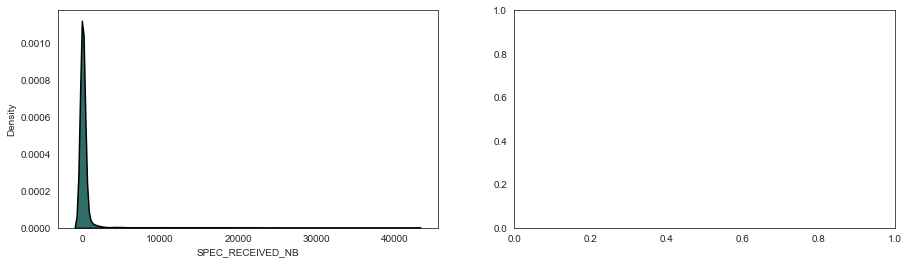

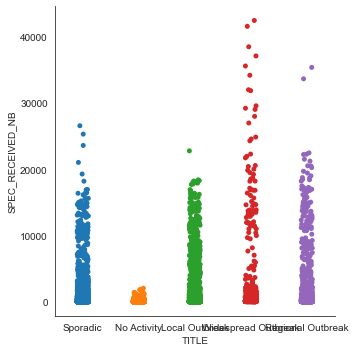

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

sns.kdeplot(df["SPEC_RECEIVED_NB"], color = '#1a5d57', shade = True, alpha = 0.9, linewidth = 1.5, edgecolor = 'black', ax=ax1)
sns.catplot('TITLE', 'SPEC_RECEIVED_NB', data=df, ax=ax2)
plt.show()

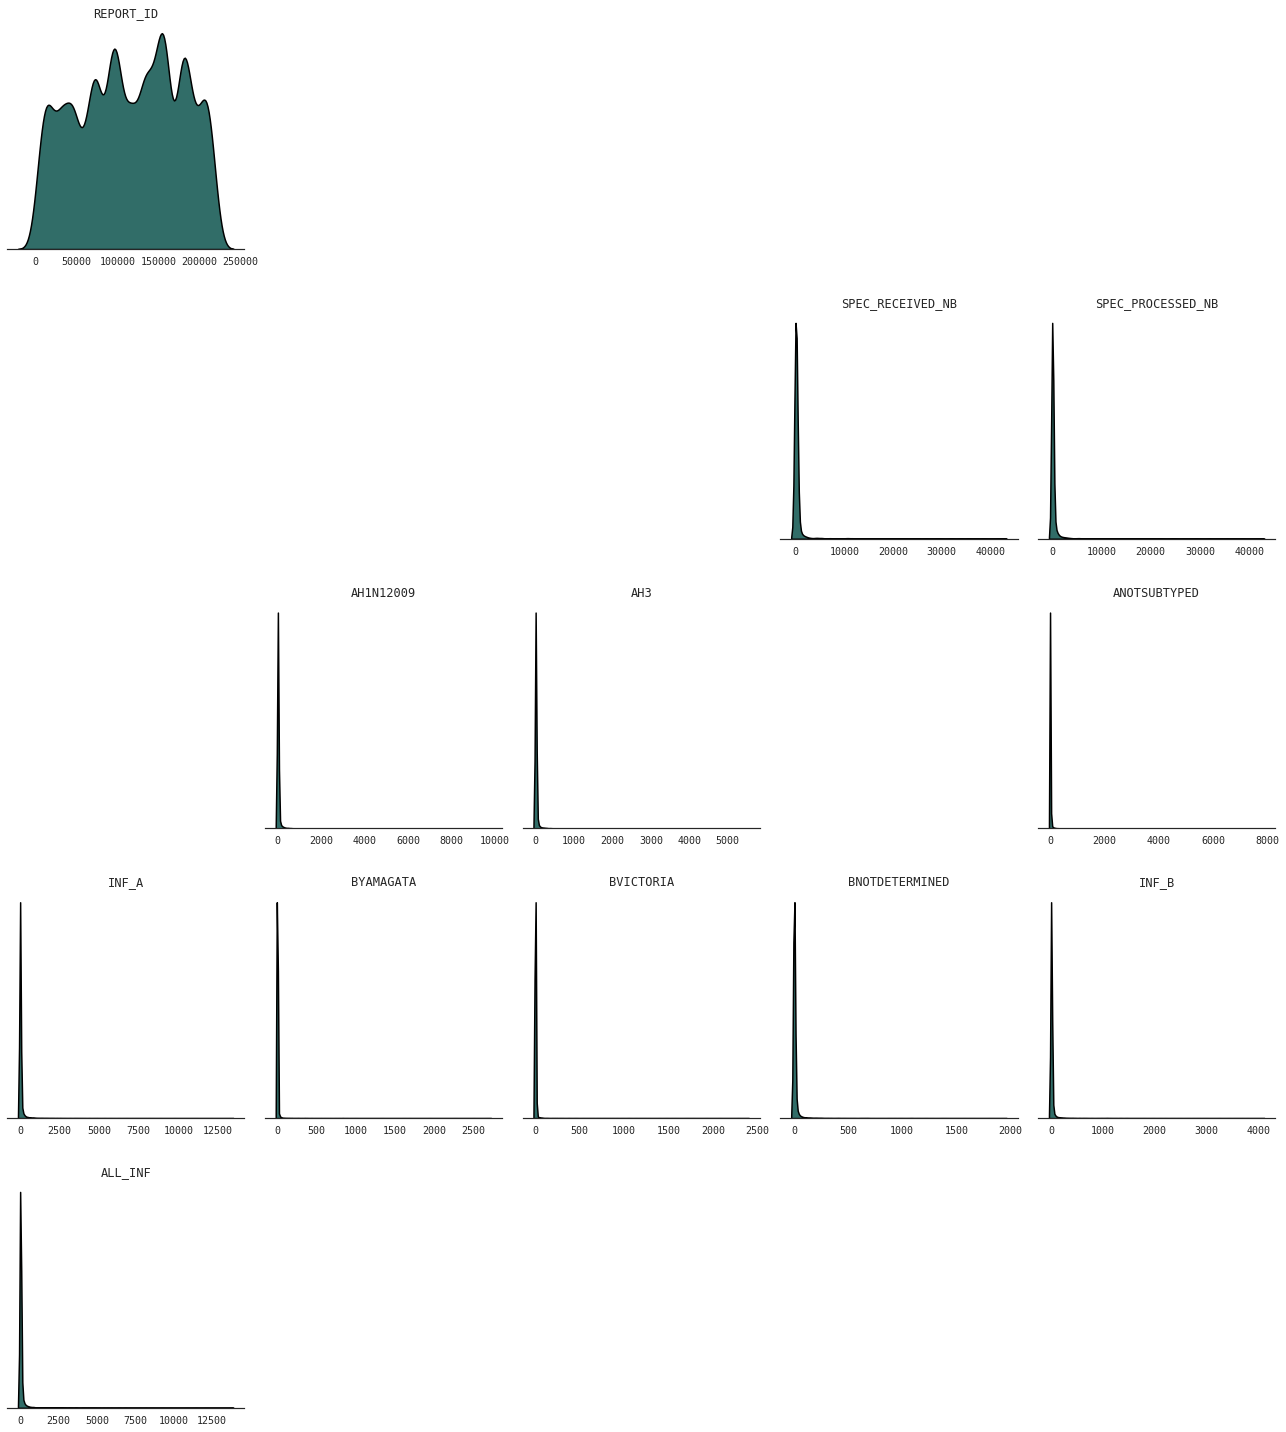

In [38]:
fig = plt.figure(figsize = (18, 20))
all_features = df.columns.tolist()[:21]


for i in range(len(all_features)):
    if all_features[i] in cat_variables: 
        continue
    elif all_features[i] in ['SDATE', 'EDATE']: 
        continue
    else:
        plt.subplot(5,5,i+1)
        sns.set_style("white")
        plt.title(all_features[i], size = 12, fontname = 'monospace')
        a = sns.kdeplot(df[all_features[i]], color = '#1a5d57', shade = True, alpha = 0.9, linewidth = 1.5, edgecolor = 'black')
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontname = 'monospace')
        plt.yticks([])
        for j in ['right', 'left', 'top']:
            a.spines[j].set_visible(False)
            a.spines['bottom'].set_linewidth(1.2)
        
fig.tight_layout(h_pad = 3)

plt.show()

In [13]:
# fig, axs = plt.subplots(11, 4, figsize=(4*4, 11*3), squeeze=False, sharey=True)

# ptr = 0
# for row in range(11):
#     for col in range(4):  
#         x = df[[cat_variables[ptr], "TITLE"]].value_counts().sort_index().to_frame().rename({0: "# of Samples"}, axis="columns").reset_index()
#         sns.barplot(x=cat_variables[ptr], y="# of Samples", hue="TITLE", data=x, ax=axs[row][col])
#         plt.xlabel(cat_variables[ptr])
#         ptr += 1
#         del(x)
# plt.tight_layout()    
# plt.show()

In [14]:
pd.set_option('display.max_columns', None)
df

,REPORT_ID,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,AH1N12009,AH3,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,1048,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,5,2015-01-26,2015-02-01,43.0,43.0,0.0,0.0,1.0,0.0,0.0,1,0.0,3.0,0.0,3,4,NaN,Sporadic
1,1059,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,16,2015-04-13,2015-04-19,22.0,22.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
2,1060,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,17,2015-04-20,2015-04-26,26.0,26.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0,1,NaN,Sporadic
3,1061,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,18,2015-04-27,2015-05-03,17.0,17.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic
4,1062,Afghanistan,Eastern Mediterranean Region of WHO,Southern Asia,2015,19,2015-05-04,2015-05-10,23.0,23.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,NaN,Sporadic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37682,219401,Zambia,African Region of WHO,Eastern Africa,2019,25,2019-06-17,2019-06-23,79.0,79.0,NaN,0.0,1.0,0.0,0.0,1,0.0,3.0,5.0,8,9,6,Sporadic
37683,219402,Zambia,African Region of WHO,Eastern Africa,2019,26,2019-06-24,2019-06-30,82.0,82.0,NaN,1.0,1.0,0.0,0.0,2,0.0,9.0,8.0,17,19,NaN,Sporadic
37684,219403,Zambia,African Region of WHO,Eastern Africa,2019,27,2019-07-01,2019-07-07,50.0,50.0,NaN,3.0,1.0,0.0,0.0,4,0.0,5.0,3.0,8,12,NaN,No Activity
37685,219404,Zambia,African Region of WHO,Eastern Africa,2019,28,2019-07-08,2019-07-14,47.0,47.0,NaN,1.0,3.0,0.0,0.0,4,0.0,0.0,2.0,2,6,NaN,No Activity


In [15]:
spor_df = df[df['TITLE'] == 'Sporadic']

# Count of "Country" for all cases where we have "Sporadic"
countryCount = spor_df.groupby(['FLUREGION', 'Country']).count()
countryCount
names = [ name[1] for name in countryCount['REPORT_ID'].index]
vals = [ val for val in countryCount['REPORT_ID'].values]
labels = [val[0] for val in countryCount['REPORT_ID'].index]

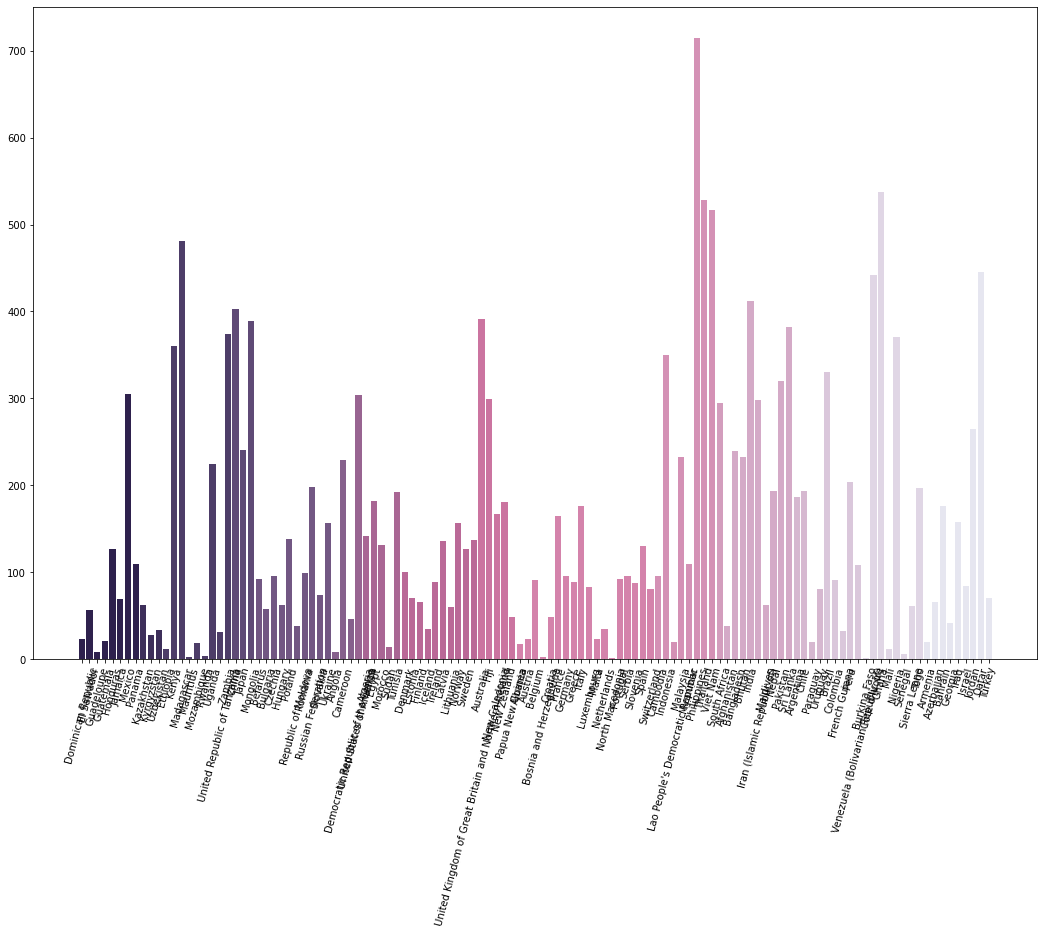

In [16]:
# Setting label colors
color_dict = {}
color = palette.Acton_18.hex_colors
for k, x in enumerate(np.unique(labels)):
    color_dict[x] = color[k]

replacer = color_dict.get  # For faster gets.
bar_colors = [replacer(n, n) for n in labels]

# Final plot
fig = plt.figure(figsize=(18, 12))
sc = plt.bar(names, vals, color=bar_colors)
plt.xticks(rotation=75)
plt.show()
# print(color_dict)